### 

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 11 19:15:23 2020

@author: juan
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from numpy import asarray
from numpy import savetxt

import os

import time

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

start = time.time() #Saves the begining time of the process

os.makedirs('GraficasProyDNN',exist_ok=True)


In [2]:
#==============================================================================
#LEER DATOS
#==============================================================================
fecha = '2021-08-31'

casos = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

sintomas = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

poblaciones = pd.read_excel('PoblacionMunicipal.xlsx')

#==============================================================================
#ELIMINAR SIN DATO
#==============================================================================

casos = casos[casos.codigo_municipio != 99]

sintomas = sintomas[sintomas.codigo_municipio != 99]

codigoCasos = casos['codigo_municipio']

codigoSintomas = sintomas['codigo_municipio']

codigoPob = poblaciones['codigo_municipio']

faltanCasosMuni = np.array(list(set(casos.municipio).symmetric_difference(poblaciones.municipio)))
faltanCasosDepto = []
for i in range(len(faltanCasosMuni)):
    faltanCasosDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'departamento'].iloc[0])
faltanCasosCodigoMuni = []
for i in range(len(faltanCasosMuni)):
    faltanCasosCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'codigo_municipio'].iloc[0])
faltanCasosPob = []
for i in range(len(faltanCasosMuni)):
    faltanCasosPob.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'poblacion'].iloc[0])
faltanCasosCodigoDepto = []
for i in range(len(faltanCasosMuni)):
    if faltanCasosDepto[i] == 'ALTA VERAPAZ':
        faltanCasosCodigoDepto.append(16)
    elif faltanCasosDepto[i] == 'BAJA VERAPAZ':
        faltanCasosCodigoDepto.append(15)
    elif faltanCasosDepto[i] == 'CHIMALTENANGO':
        faltanCasosCodigoDepto.append(4)
    elif faltanCasosDepto[i] == 'CHIQUIMULA':
        faltanCasosCodigoDepto.append(20)
    elif faltanCasosDepto[i] == 'EL PROGRESO':
        faltanCasosCodigoDepto.append(2)
    elif faltanCasosDepto[i] == 'ESCUINTLA':
        faltanCasosCodigoDepto.append(5)
    elif faltanCasosDepto[i] == 'GUATEMALA':
        faltanCasosCodigoDepto.append(1)
    elif faltanCasosDepto[i] == 'HUEHUETENANGO':
        faltanCasosCodigoDepto.append(13)
    elif faltanCasosDepto[i] == 'IZABAL':
        faltanCasosCodigoDepto.append(18)
    elif faltanCasosDepto[i] == 'JALAPA':
        faltanCasosCodigoDepto.append(21)
    elif faltanCasosDepto[i] == 'JUTIAPA':
        faltanCasosCodigoDepto.append(22)
    elif faltanCasosDepto[i] == 'PETEN':
        faltanCasosCodigoDepto.append(17)
    elif faltanCasosDepto[i] == 'QUETZALTENANGO':
        faltanCasosCodigoDepto.append(9)
    elif faltanCasosDepto[i] == 'QUICHE':
        faltanCasosCodigoDepto.append(14)
    elif faltanCasosDepto[i] == 'RETALHULEU':
        faltanCasosCodigoDepto.append(11)
    elif faltanCasosDepto[i] == 'SACATEPEQUEZ':
        faltanCasosCodigoDepto.append(3)
    elif faltanCasosDepto[i] == 'SAN MARCOS':
        faltanCasosCodigoDepto.append(12)
    elif faltanCasosDepto[i] == 'SANTA ROSA':
        faltanCasosCodigoDepto.append(6)
    elif faltanCasosDepto[i] == 'SOLOLA':
        faltanCasosCodigoDepto.append(7)
    elif faltanCasosDepto[i] == 'SUCHITEPEQUEZ':
        faltanCasosCodigoDepto.append(10)
    elif faltanCasosDepto[i] == 'TOTONICAPAN':
        faltanCasosCodigoDepto.append(8)
    elif faltanCasosDepto[i] == 'ZACAPA':
        faltanCasosCodigoDepto.append(19)

faltanSintomasMuni = np.array(list(set(sintomas.municipio).symmetric_difference(poblaciones.municipio)))
faltanSintomasDepto = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'departamento'].iloc[0])
faltanSintomasCodigoMuni = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'codigo_municipio'].iloc[0])
faltanSintomasPob = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasPob.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'poblacion'].iloc[0])
faltanSintomasCodigoDepto = []
for i in range(len(faltanSintomasMuni)):
    if faltanSintomasDepto[i] == 'ALTA VERAPAZ':
        faltanSintomasCodigoDepto.append(16)
    elif faltanSintomasDepto[i] == 'BAJA VERAPAZ':
        faltanSintomasCodigoDepto.append(15)
    elif faltanSintomasDepto[i] == 'CHIMALTENANGO':
        faltanSintomasCodigoDepto.append(4)
    elif faltanSintomasDepto[i] == 'CHIQUIMULA':
        faltanSintomasCodigoDepto.append(20)
    elif faltanSintomasDepto[i] == 'EL PROGRESO':
        faltanSintomasCodigoDepto.append(2)
    elif faltanSintomasDepto[i] == 'ESCUINTLA':
        faltanSintomasCodigoDepto.append(5)
    elif faltanSintomasDepto[i] == 'GUATEMALA':
        faltanSintomasCodigoDepto.append(1)
    elif faltanSintomasDepto[i] == 'HUEHUETENANGO':
        faltanSintomasCodigoDepto.append(13)
    elif faltanSintomasDepto[i] == 'IZABAL':
        faltanSintomasCodigoDepto.append(18)
    elif faltanSintomasDepto[i] == 'JALAPA':
        faltanSintomasCodigoDepto.append(21)
    elif faltanSintomasDepto[i] == 'JUTIAPA':
        faltanSintomasCodigoDepto.append(22)
    elif faltanSintomasDepto[i] == 'PETEN':
        faltanSintomasCodigoDepto.append(17)
    elif faltanSintomasDepto[i] == 'QUETZALTENANGO':
        faltanSintomasCodigoDepto.append(9)
    elif faltanSintomasDepto[i] == 'QUICHE':
        faltanSintomasCodigoDepto.append(14)
    elif faltanSintomasDepto[i] == 'RETALHULEU':
        faltanSintomasCodigoDepto.append(11)
    elif faltanSintomasDepto[i] == 'SACATEPEQUEZ':
        faltanSintomasCodigoDepto.append(3)
    elif faltanSintomasDepto[i] == 'SAN MARCOS':
        faltanSintomasCodigoDepto.append(12)
    elif faltanSintomasDepto[i] == 'SANTA ROSA':
        faltanSintomasCodigoDepto.append(6)
    elif faltanSintomasDepto[i] == 'SOLOLA':
        faltanSintomasCodigoDepto.append(7)
    elif faltanSintomasDepto[i] == 'SUCHITEPEQUEZ':
        faltanSintomasCodigoDepto.append(10)
    elif faltanSintomasDepto[i] == 'TOTONICAPAN':
        faltanSintomasCodigoDepto.append(8)
    elif faltanSintomasDepto[i] == 'ZACAPA':
        faltanSintomasCodigoDepto.append(19)
#==============================================================================
#AGREGAR DATOS QUE FALTAN
#==============================================================================
#extraer una fila del df de casos
primerafila = casos.iloc[1]
primerafila = primerafila.iloc[5:].values
datosFaltan = np.zeros(len(primerafila))

datosFaltanCasosCols = casos.columns
datosFaltanSintomasCols = sintomas.columns

datosFaltanCasos = np.zeros((len(faltanCasosDepto),len(datosFaltanCasosCols))).astype(object)
for i in range(len(faltanCasosDepto)):
    for j in range(len(datosFaltanCasosCols)):
        if j ==0:
            datosFaltanCasos[i][j] = faltanCasosDepto[i]
        elif j==1:
            datosFaltanCasos[i][j] = faltanCasosCodigoDepto[i]
        elif j==2:
            datosFaltanCasos[i][j] = faltanCasosMuni[i]
        elif j==3:
            datosFaltanCasos[i][j] = faltanCasosCodigoMuni[i]
        elif j==4:
            datosFaltanCasos[i][j] = faltanCasosPob[i]
            
datosFaltanSintomas = np.zeros((len(faltanSintomasDepto),len(datosFaltanSintomasCols))).astype(object)
for i in range(len(faltanSintomasDepto)):
    for j in range(len(datosFaltanSintomasCols)):
        if j ==0:
            datosFaltanSintomas[i][j] = faltanSintomasDepto[i]
        elif j==1:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoDepto[i]
        elif j==2:
            datosFaltanSintomas[i][j] = faltanSintomasMuni[i]
        elif j==3:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoMuni[i]
        elif j==4:
            datosFaltanSintomas[i][j] = faltanSintomasPob[i]
            
FaltanCasos = pd.DataFrame(datosFaltanCasos,columns=casos.columns)
FaltanSintomas = pd.DataFrame(datosFaltanSintomas,columns=sintomas.columns)

print('En casos positivos no hay datos de ' + str(FaltanCasos['municipio'].values))
print('En sintomas no hay datos de ' + str(FaltanSintomas['municipio'].values))

casos = casos.append(FaltanCasos)
sintomas = sintomas.append(FaltanSintomas)


En casos positivos no hay datos de []
En sintomas no hay datos de []


/tmp/ipykernel_4373/2820531107.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  casos = casos.append(FaltanCasos)
/tmp/ipykernel_4373/2820531107.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sintomas = sintomas.append(FaltanSintomas)


In [3]:
#==============================================================================
#EXTRAER DATOS POR DEPARTAMENTO
#==============================================================================

departamentos = casos['departamento'].unique()
municipios = casos['municipio'].unique()

casosDepto = {}
for depto in departamentos:
    casosDepto[depto] = pd.DataFrame(casos.loc[casos['departamento'] == depto])
    casosDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    casosDepto[depto] = casosDepto[depto].set_index('municipio')
    
sintomasDepto = {}

for depto in departamentos:
    sintomasDepto[depto] = pd.DataFrame(sintomas.loc[sintomas['departamento'] == depto])
    sintomasDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    sintomasDepto[depto] = sintomasDepto[depto].set_index('municipio')
    
pobDepto = {}

for depto in departamentos:
    pobDepto[depto] = pd.DataFrame(poblaciones.loc[poblaciones['departamento'] == depto])
    pobDepto[depto].drop(['codigo_municipio','departamento'], axis = 1, inplace = True)
    pobDepto[depto] = pobDepto[depto].set_index('municipio')
    

In [4]:
#municipios

In [5]:
#==============================================================================
#DATOS POR DEPARTAMENTO UTILES
#==============================================================================
fechas = casosDepto['GUATEMALA'].columns.values
fechas1 = fechas[7::14]
fechas2 = fechas1[1:len(fechas1)]
diasMediaMovil = 14

NOMBREDEPTO = []
Poblacion =[]
POSITIVOSDEPTO = []
SINTOMASDEPTO = []

for depto in departamentos:
    pob = 0
    cantidadMunicipios = len(casosDepto[depto].index)
    positivosDepto = np.zeros(len(fechas))
    sintomasTotalesDepto = np.zeros(len(fechas))
    mediamovilDepto = np.zeros(len(fechas)-diasMediaMovil)
    
    for muni in casosDepto[depto].index:
        
        positivos = casosDepto[depto].loc[muni].values.astype(float)
        sintomasTotales = sintomasDepto[depto].loc[muni].values.astype(float)
        
        positivosDepto = positivos + positivosDepto
        
        sintomasTotalesDepto = sintomasTotalesDepto + sintomasTotales
        
        pob += pobDepto[depto].loc[muni].values[0]
        
    for i in range(len(positivosDepto)-diasMediaMovil):
        mediamovilDepto[i] = np.mean(positivosDepto[i:i+diasMediaMovil]) #LINEA IMPORTANTE
    
    NOMBREDEPTO.append(depto)
    Poblacion.append(pob)
    POSITIVOSDEPTO.append(mediamovilDepto)#POSITIVOSDEPTO.append(positivosDepto)
    SINTOMASDEPTO.append(sintomasTotalesDepto)
    
acumuladosReportados = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))
acumuladosSintomas = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))

for j in range(len(NOMBREDEPTO)):
    for i in range(len(POSITIVOSDEPTO[0])-1):
        if i ==0:
            acumuladosReportados[j][i] = POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = SINTOMASDEPTO[j][i]
            
        else:
            acumuladosReportados[j][i] = acumuladosReportados[j][i-1] + POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = acumuladosSintomas[j][i-1] + SINTOMASDEPTO[j][i]
#HASTA ACA LIMPIEZA Y EXTRACCION DE DATOS


In [6]:
#==============================================================================
#ESTIMACIONES DE BETA y OTRAS VARIABLES DEL MODELO SIR
#==============================================================================
#INICIALIZACION DE VARIABLES
gamma = 1./21.
A = acumuladosReportados #TOTAL DE INDIVIDUOS QUE SE HAN INFECTADO.
dA = POSITIVOSDEPTO #CASOS NUEVOS REPORTADOS CADA DIA POR CADA DEPARTAMENTO
R = np.zeros((len(A),len(A[0])))
I = A - R
S = np.zeros((len(A),len(A[0])))
Beta = np.zeros((len(A),len(A[0])))
Rt = np.zeros((len(A),len(A[0])))
R0 = np.zeros((len(A),len(A[0])))

inicio = 100

for i in range(len(A)):
    for j in range(len(A[0])):
        S[i][j] = Poblacion[i] - A[i][j] #ECUACION (4.37)
        
for i in range(len(A)):
    N = Poblacion[i]
    for j in range(len(A[0])-1):
        if j>20: #porque empezamos desde j=0.
            R[i][j] = dA[i][j-21] + R[i][j-1] #ECUACION (4.38)
        else:
            R[i][j] = 0
            
        if A[i][j] - R[i][j] <= 0:
            I[i][j] = I[i][j-1]
        else:
            I[i][j] = A[i][j] - R[i][j] #ECUACION (4.39)
        S[i][j] = N - I[i][j] - R[i][j]
        Beta[i][j] = dA[i][j+1]/(S[i][j]*I[i][j])*N ##ECUACION (5.1)
        #mas adelante quitar el ultimo de beta porque es cero.
        Rt[i][j] = Beta[i][j]/gamma * S[i][j]/N
        R0[i][j] = Beta[i][j]/gamma
        
        if A[i][j] <= 0:
            A[i][j] = A[i][j-1]


In [7]:
I_prima = []
for i in range(len(I[0])-1):
    I_prima.append(I[0][i+1]-I[0][i])

In [8]:
h = 10
H = []
mu = 3.55
x = []
for i in range(1,800):
    h = h + mu*h*i/1000*(1-h*i/1000)
    H.append(h)
    x.append(i)



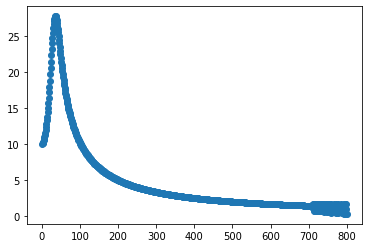

In [9]:
plt.scatter(x,H)


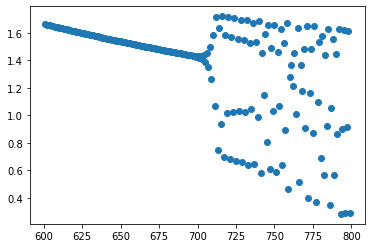

In [10]:
plt.scatter(x[600:],H[600:])

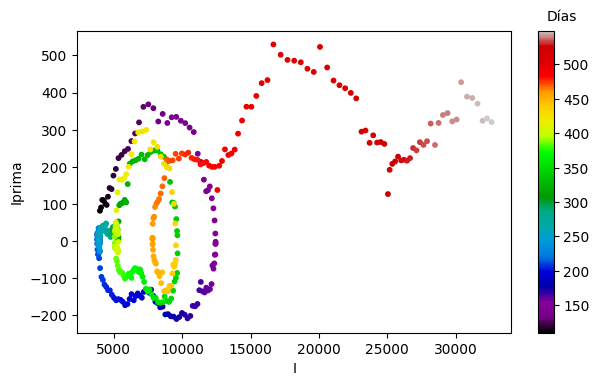

In [11]:
color = []
t=550
for i in range(110,t):
    color.append(i)

from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=100)
plt.scatter(I[0][110:t], I_prima[110:t], c=color, s=10, cmap='nipy_spectral')
clb =  plt.colorbar()
clb.set_label('Días', labelpad=-20, y=1.07, rotation=0)
plt.xlabel("I")
plt.ylabel("Iprima")

#plt.plot(A[0][110:t], Beta[0][110:t])
plt.show()

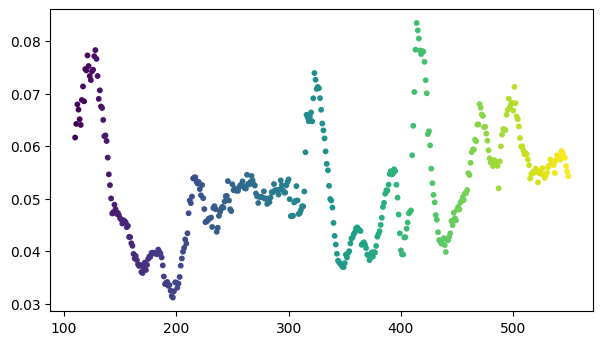

In [12]:
color = []
t=550
for i in range(110,t):
    color.append(i)

from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=100)
plt.scatter(color, Beta[0][110:t], c=color, s=10)
#plt.plot(A[0][110:t], Beta[0][110:t])
plt.show()

In [13]:
import math

In [14]:
def theta(j,eta,x):
    angulo = j*eta
    for i in range(1,j+1):
        angulo = angulo + x[i]
    return angulo


def p(n, eta, x):
    p = 0
    for j in range(1,n+1):
        angulo = theta(j,eta,x)
        p = p+x[j]*math.cos(angulo)
    return p



def q(n, eta, x):
    q = 0
    for j in range(1,n+1):
        angulo = theta(j,eta,x)
        q = q+x[j]*math.sin(angulo)
    return q

In [15]:
A = []
B = []
for i in range(1,430):
    A.append(p(i, 1.5, dA[11][110:t]))
    B.append(q(i, 1.5, dA[11][110:t]))

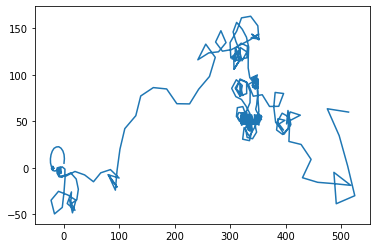

In [16]:
plt.plot(B,A)

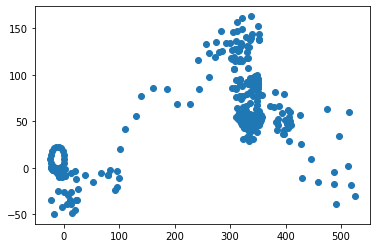

In [17]:
plt.scatter(B,A)

In [18]:
A = []
B = []
x=[]
for i in range(1,1000):
    x.append(1/(i*i))

In [19]:
for i in range(1,900):
    A.append(p(i, 2, x))
    B.append(q(i, 2, x))

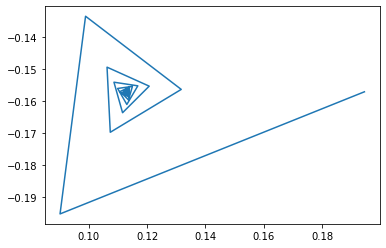

In [20]:
plt.plot(B,A)

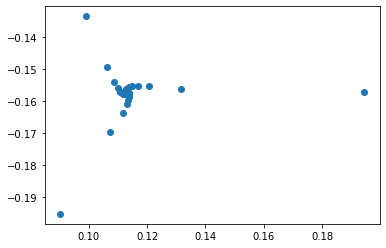

In [21]:
plt.scatter(B,A)

In [22]:
from random import seed
from random import random
from random import randint
# seed random number generator
seed(1)
# seed random number generator
seed(1)

In [23]:
A = []
B = []
x=[]
for i in range(1,100):
    x.append(i+randint(0, 10))

In [24]:
for i in range(1,90):
    A.append(p(i, 2, x))
    B.append(q(i, 2, x))

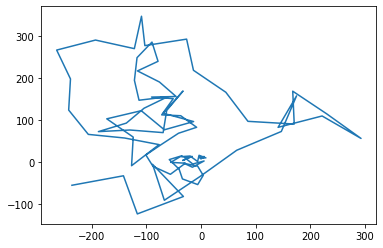

In [25]:
plt.plot(B,A)

In [26]:
A = []
B = []
x=[]
for i in range(1,100):
    x.append(i)

In [27]:
for i in range(1,90):
    A.append(p(i, 2, x))
    B.append(q(i, 2, x))

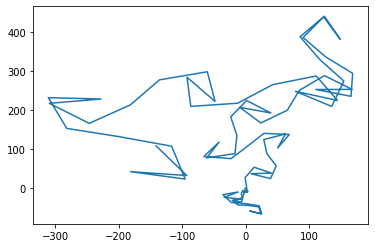

In [28]:
plt.plot(B,A)

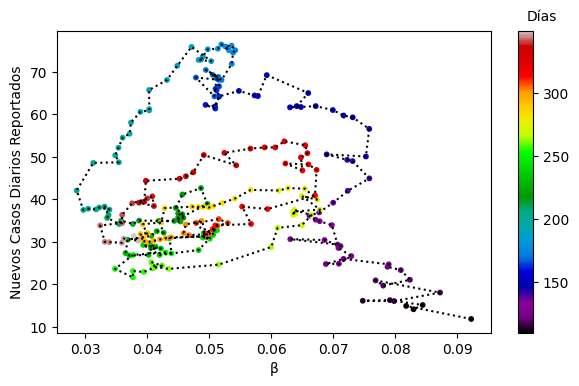

In [36]:
color = []
t=350
for i in range(110,t):
    color.append(i)

from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=100)
plt.scatter(Beta[10][110:t], dA[10][110:t], c=color, s=10, cmap='nipy_spectral')
plt.plot(Beta[10][110:t], dA[10][110:t], markersize=0.1, linestyle='dotted', color = 'k')
clb =  plt.colorbar()
clb.set_label('Días', labelpad=-20, y=1.07, rotation=0)
plt.xlabel("\u03B2")
plt.ylabel("Nuevos Casos Diarios Reportados")

#plt.plot(A[0][110:t], Beta[0][110:t])
plt.show()

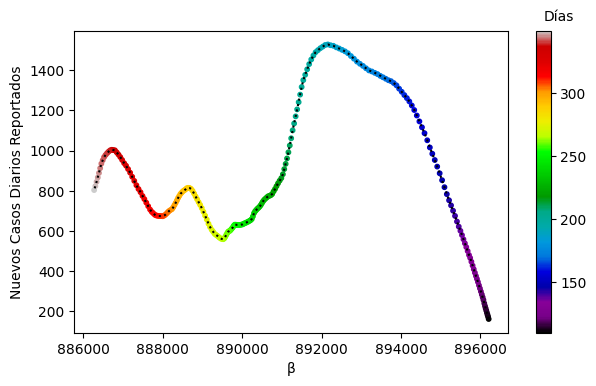

In [37]:
color = []
t=350
for i in range(110,t):
    color.append(i)

from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=100)
plt.scatter(S[10][110:t], I[10][110:t], c=color, s=10, cmap='nipy_spectral')
plt.plot(S[10][110:t], I[10][110:t], markersize=0.1, linestyle='dotted', color = 'k')
clb =  plt.colorbar()
clb.set_label('Días', labelpad=-20, y=1.07, rotation=0)
plt.xlabel("\u03B2")
plt.ylabel("Nuevos Casos Diarios Reportados")

#plt.plot(A[0][110:t], Beta[0][110:t])
plt.show()

In [30]:
np.mean(Beta[0][110:t])

0.050524973507453365

In [31]:
Beta[0][50:60] #parece que aca aun no se ha estabilizado beta, aun esta afectado por el ruido, no es un calculo
#confiable

array([0.06060625, 0.10000031, 0.16071481, 0.26785806, 0.29032367,
       0.30555681, 0.43182015, 0.34426413, 0.28048954, 0.22381112])

In [32]:
#-----------------------------------------------------------------------------
    #RED NEURONAL y OTRAS FUNCIONES
#-----------------------------------------------------------------------------


#MODIFICA EL ARREGLO DE DATOS PARA QUE TENGA LA FORMA DE LA EXPRESIÓN (4.41)
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,0])
        Y.append(data_arr[d,0])
    return np.array(X), np.array(Y)


#trainX, trainY = convert2matrix(train, look_back)
#testX, testY = convert2matrix(test, look_back)
##################################################################################


from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import seaborn as sns

#CREACION DE LA RED DE LA FIGURA (4.7)
def model_dnn(look_back):
    # Dense Neural Network significa que estan conectadas todas las neuronas de una capa
    #con todas las neuronas de las capas vecinas.
    model=Sequential()
    model.add(Dense(units=64, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

#model = model_dnn(look_back)

#history = model.fit(trainX,trainY,epochs=100,batch_size=30,verbose=1,validation_data=(testX,testY),shuffle=False)

#GRAFICA LA FUNCION DE COSTO DE LA EXPRESION (4.42)
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss - '+NOMBREDEPTO[n])
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.savefig('GraficasProyDNN/'+NOMBREDEPTO[n]+'Loss.pdf', bbox_inches = 'tight')
    #plt.show();

    
#GRAFICA LAS PREDICCIONES Y LOS VALORES OBSERVADOS 
#CORRESPONDIENTES AL CONJUNTO DE EVALUACION.
def prediction_plot(testY, test_predict,n):
    len_prediction=[x for x in range(len(testY))]
    plt.figure(figsize=(8,4))
    plt.plot(len_prediction, testY, marker='.', label="actual")
    plt.plot(len_prediction, test_predict, 'r', label="prediction")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Beta', size=15)
    plt.xlabel('Dias', size=15)
    plt.title(NOMBREDEPTO[n])
    plt.legend(fontsize=15)
    plt.savefig('GraficasProyDNN/'+NOMBREDEPTO[n]+'ProyRt.png', bbox_inches = 'tight')
    #plt.show();

2022-11-27 18:54:55.995187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-27 18:54:55.995271: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [33]:

#look_back es el equivalente a n en la expresion (4.41).
#Se utilizaran 30 datos para predecir el valor al dia 31.
look_back = 30
